In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [2]:
data = pd.read_csv(r'C:\Users\noush\Downloads\diabetes.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#As the data contains null values staistically 0 in the Columns Blood Pressure , Insulin so to balance the data we replace the values with thier respective mean or median
mInsulin = data['Insulin'].median(skipna=True)
mBP = data['BloodPressure'].median(skipna=True)
mst = data['SkinThickness'].median(skipna=True)
data['Insulin']=data.Insulin.mask(data.Insulin == 0,mInsulin)
data['BloodPressure'] = data.BloodPressure.mask(data.BloodPressure == 0,mBP)
data['SkinThickness'] = data.SkinThickness.mask(data.SkinThickness == 0,mst)

In [53]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.386719,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.096642,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


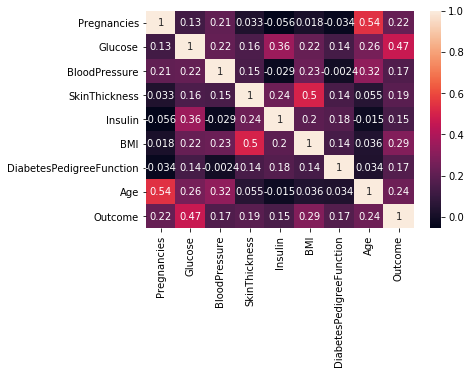

In [54]:
corelation = data.corr()
sns.heatmap(corelation,annot = True)

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

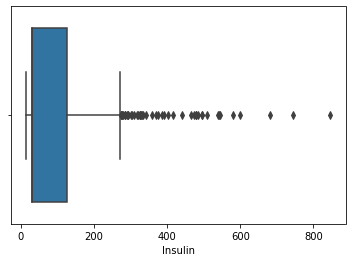

In [8]:
sns.boxplot(data['Insulin'])

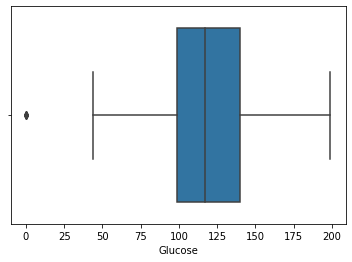

In [9]:
sns.boxplot(data['Glucose'])

In [10]:
#Z-Score for Checking Outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.63994726 0.84832379 0.03198993 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.5283186  ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.69376149 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.03198993 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  1.02464727 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.19743282 ... 0.47378505 0.87137393 0.73212021]]


In [55]:
#Set Threshold 4
threshold = 4
print(np.where(z > 4))

(array([  4,   8,   9,  13,  45,  49,  60,  81, 106, 145, 177, 228, 228,
       247, 286, 370, 371, 409, 426, 445, 459, 494, 522, 579, 584, 597,
       655, 684, 706], dtype=int64), array([6, 4, 5, 4, 6, 5, 5, 5, 2, 5, 5, 4, 6, 4, 4, 6, 5, 4, 5, 6, 7, 5,
       5, 3, 4, 2, 4, 5, 5], dtype=int64))


In [12]:
data_o1= data[(z < 4).all(axis=1)]#storing the data after removing the data records with z-score more than 4
data_o1.shape

(740, 9)

In [13]:
data_o2 = data[(z < 3).all(axis=1)]#storing the data after removing the data records with z-score more than 3
data_o2.shape

(705, 9)

In [14]:
data_o1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,23,30.5,25.6,0.201,30,0


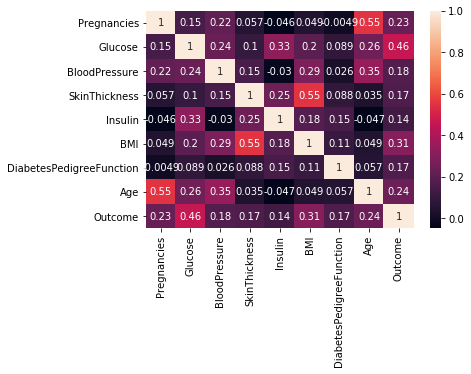

In [15]:
corelation = data_o1.corr()
sns.heatmap(corelation,annot = True)

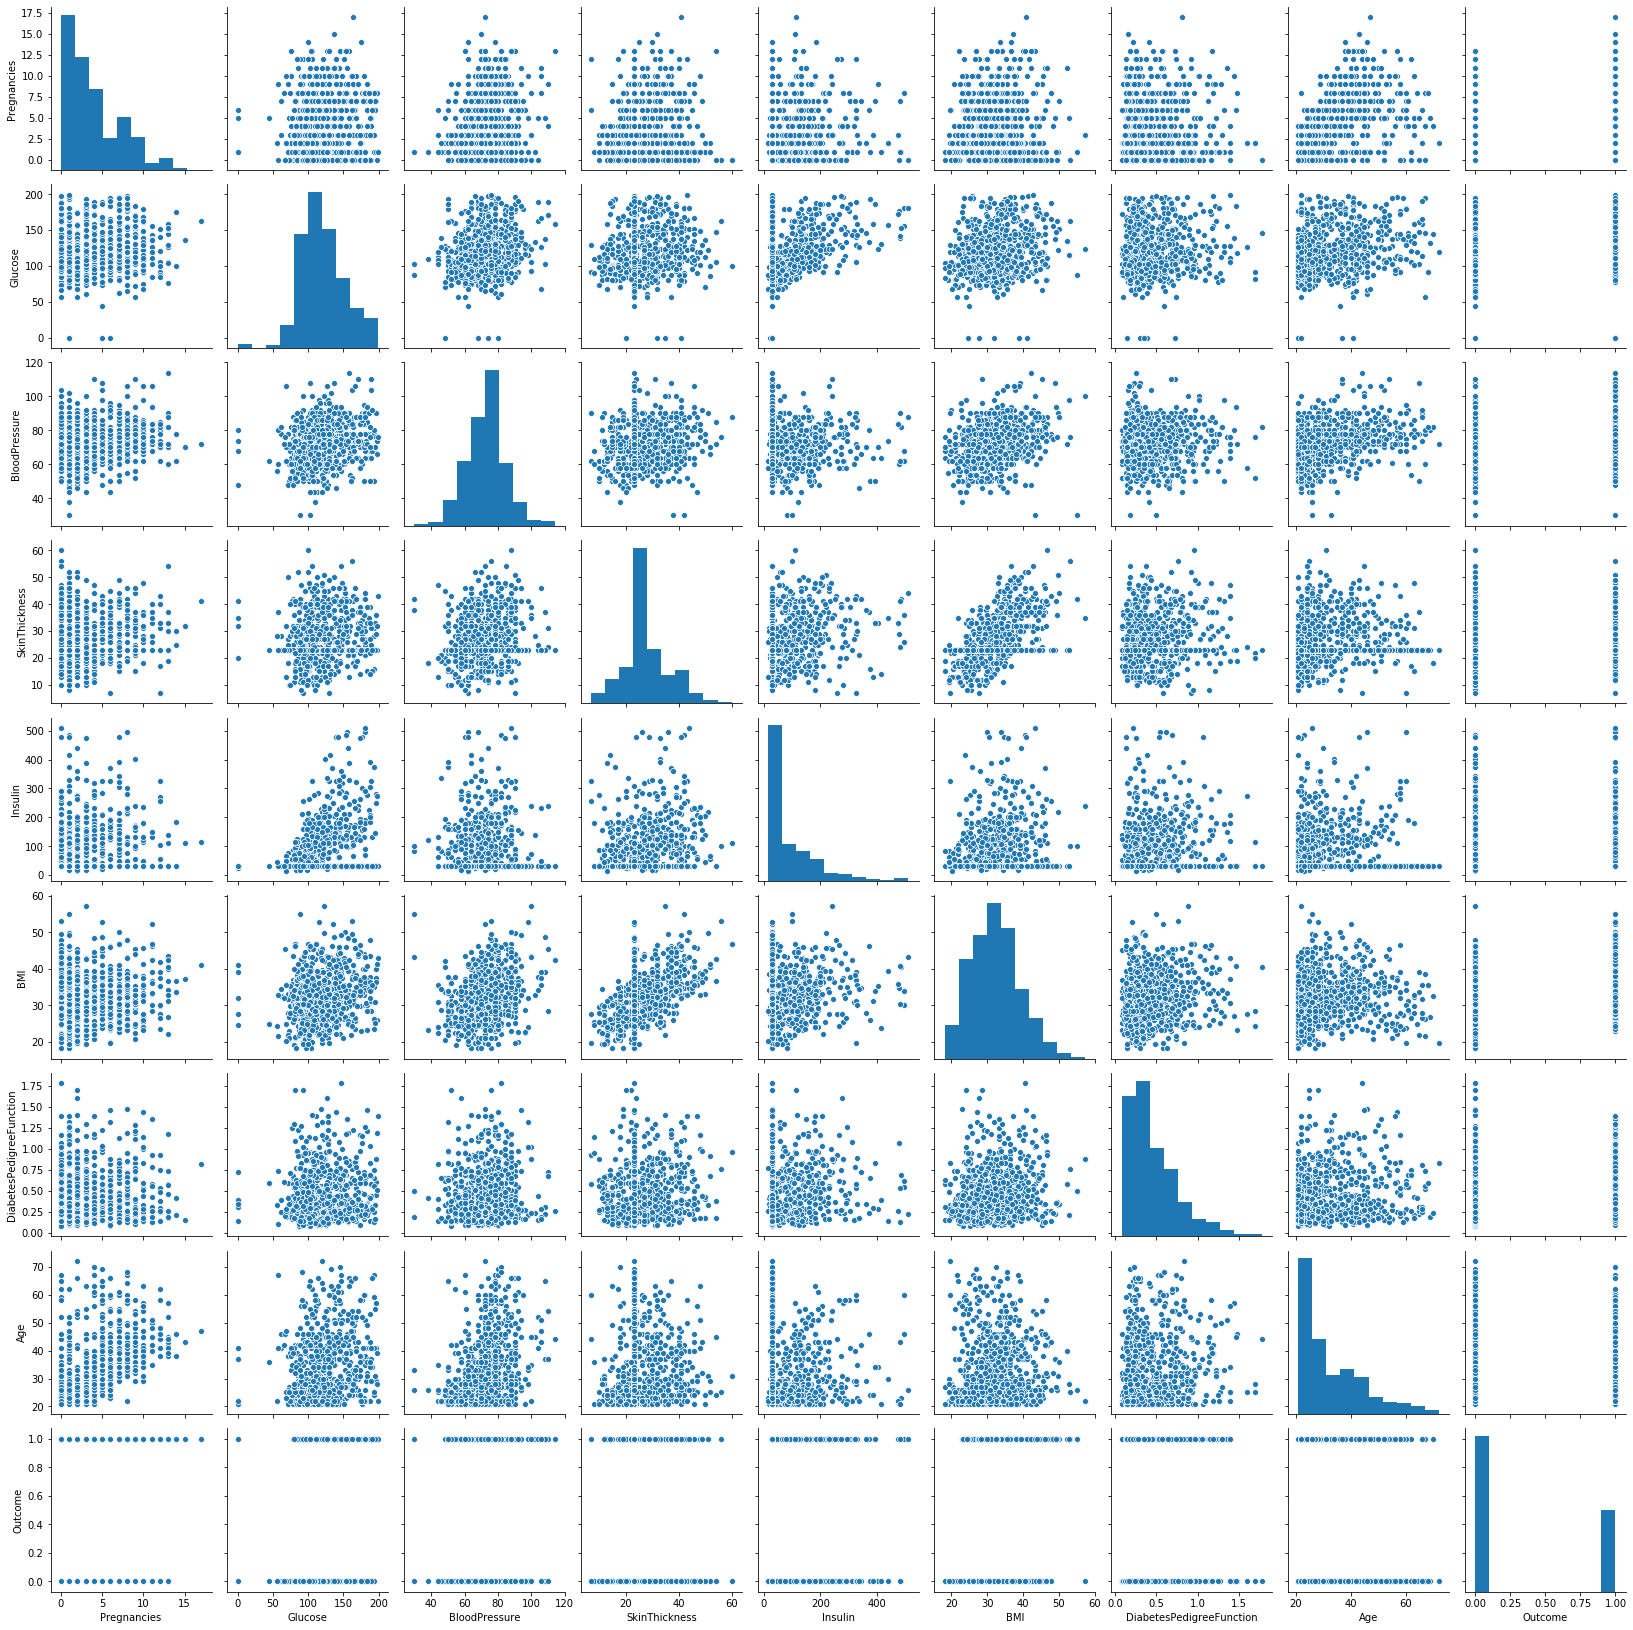

In [16]:
sns.pairplot(data_o1,kind="scatter")

In [56]:
# Univariate Feature method
from sklearn.feature_selection import SelectKBest , chi2 #for statistical test of independent features
x = data_o1.drop("Outcome",axis=1)
y = data_o1['Outcome']
print(x.shape)
print(y.shape)

(740, 8)
(740,)


In [18]:
bf = SelectKBest(score_func=chi2,k=6)
fit = bf.fit(x,y)

In [19]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
fs = pd.concat([df_scores,df_columns],axis=1)
fs.columns = ['Scores','Features']

In [20]:
print(fs)

        Scores                  Features
0   118.905753               Pregnancies
1  1295.774530                   Glucose
2    45.877107             BloodPressure
3    57.556510             SkinThickness
4  1210.389622                   Insulin
5    96.891676                       BMI
6     4.038959  DiabetesPedigreeFunction
7   170.432737                       Age


In [21]:
# 6 Features we got from Univariate Method --> Glucose , Insulin , BMI , Age , Pregnancies 

In [22]:
# Feature Importance Method
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.1063624  0.22917219 0.10032122 0.08304037 0.07807558 0.1471021
 0.11678623 0.13913991]


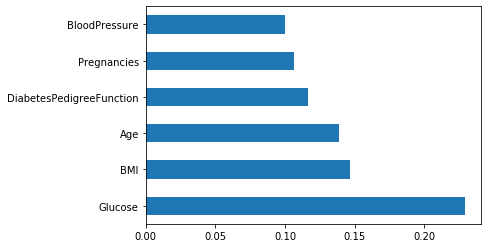

In [24]:
fi = pd.Series(model.feature_importances_, index = x.columns)
fi.nlargest(6).plot(kind="barh")

In [25]:
# Features that i got from ExtraTreesClassifier are Glucose, Age , BMI , DiabetesPedigreeFunction , Pregnancies & BloodPressure
# As We generalize the dataset and the features we got from the both Univariate and the Feature importance methods 
#Insulin is even the factor whch effects in classifying the Diabetes 
# The final Features we Select after analysing the results are Glucose, BMI , Age, DiabetesPredigreeFunction , Insulin & Pregnancies

In [57]:
x = data_o1.drop(['BloodPressure','SkinThickness','Outcome'],axis=1).values
y = data_o1['Outcome'].values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)
x_train.shape

(629, 6)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
#KNN Algo
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train,y_train)#fitting the model on train dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [30]:
atrain = accuracy_score(y_train,knn.predict(x_train))
knpr = knn.predict(x_test)
atest = accuracy_score(y_test,knpr)
print("Accuracy Train: ",atrain)
print("Accuracy Test: ",atest)

Accuracy Train:  0.7631160572337043
Accuracy Test:  0.8018018018018018


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,knpr)
print(cm)
print(classification_report(y_test,knpr))

[[65  8]
 [14 24]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        73
           1       0.75      0.63      0.69        38

    accuracy                           0.80       111
   macro avg       0.79      0.76      0.77       111
weighted avg       0.80      0.80      0.80       111



In [32]:
#SVM
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
SVC_params ={'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
SVC_model = GridSearchCV(SVC(), SVC_params, cv=5)
svm = SVC()
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
actrain = accuracy_score(y_train,svm.predict(x_train))
svpr = svm.predict(x_test)
actest = accuracy_score(y_test,svpr)
print("Accuracy Train: ",actrain)
print("Accuracy Test: ",actest)

Accuracy Train:  0.753577106518283
Accuracy Test:  0.8378378378378378


In [34]:
cm=confusion_matrix(y_test,svpr)
print(cm)
print(classification_report(y_test,svpr))

[[68  5]
 [13 25]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        73
           1       0.83      0.66      0.74        38

    accuracy                           0.84       111
   macro avg       0.84      0.79      0.81       111
weighted avg       0.84      0.84      0.83       111



In [35]:
#Stochastic Gradient Descent Algo
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "modified_huber",shuffle =True) 
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
agtrain = accuracy_score(y_train,sgd.predict(x_train))
agtest = accuracy_score(y_test,sgd.predict(x_test))
print("Accuracy Train: ",agtrain)
print("Accuracy Test: ",agtest)

Accuracy Train:  0.6581875993640699
Accuracy Test:  0.6756756756756757


In [37]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
dt.fit (x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
attrain = accuracy_score(y_train,dt.predict(x_train))
attest = accuracy_score(y_test,dt.predict(x_test))
print("Accuracy Train: ",attrain)
print("Accuracy Test: ",attest)

Accuracy Train:  0.7980922098569158
Accuracy Test:  0.7657657657657657


In [39]:
#Random Forest
rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
artrain = accuracy_score(y_train,rf.predict(x_train))
rfpr = rf.predict(x_test)
artest = accuracy_score(y_test,rfpr)
print("Accuracy Train: ",artrain)
print("Accuracy Test: ",artest)

Accuracy Train:  0.809220985691574
Accuracy Test:  0.8108108108108109


In [41]:
cm=confusion_matrix(y_test,rfpr)
print(cm)
print(classification_report(y_test,rfpr))

[[65  8]
 [13 25]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        73
           1       0.76      0.66      0.70        38

    accuracy                           0.81       111
   macro avg       0.80      0.77      0.78       111
weighted avg       0.81      0.81      0.81       111



In [42]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lretrain = accuracy_score(y_train,reg.predict(x_train))
regpr = reg.predict(x_test)
lretest = accuracy_score(y_test,regpr)
print("Accuracy Train: ",lretrain)
print("Accuracy Test: ",lretest)

Accuracy Train:  0.7694753577106518
Accuracy Test:  0.8558558558558559


In [44]:
cm=confusion_matrix(y_test,regpr)
print(cm)
print(classification_report(y_test,regpr))

[[68  5]
 [11 27]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        73
           1       0.84      0.71      0.77        38

    accuracy                           0.86       111
   macro avg       0.85      0.82      0.83       111
weighted avg       0.85      0.86      0.85       111



In [45]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [46]:
etrain = accuracy_score(y_train,etc.predict(x_train))
etcpr = etc.predict(x_test)
etest = accuracy_score(y_test,etcpr)
print("Accuracy Train: ",etrain)
print("Accuracy Test: ",etest)

Accuracy Train:  1.0
Accuracy Test:  0.7837837837837838


In [47]:
cm=confusion_matrix(y_test,etcpr)
print(cm)
print(classification_report(y_test,etcpr))

[[61 12]
 [12 26]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        73
           1       0.68      0.68      0.68        38

    accuracy                           0.78       111
   macro avg       0.76      0.76      0.76       111
weighted avg       0.78      0.78      0.78       111



In [48]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
gbtrain = accuracy_score(y_train,gbc.predict(x_train))
gbcpr = gbc.predict(x_test)
gbtest = accuracy_score(y_test,gbcpr)
print("Accuracy Train: ",gbtrain)
print("Accuracy Test: ",gbtest)

Accuracy Train:  0.9014308426073132
Accuracy Test:  0.8468468468468469


In [50]:
cm=confusion_matrix(y_test,gbcpr)
print(cm)
print(classification_report(y_test,gbcpr))

[[68  5]
 [12 26]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        73
           1       0.84      0.68      0.75        38

    accuracy                           0.85       111
   macro avg       0.84      0.81      0.82       111
weighted avg       0.85      0.85      0.84       111



In [51]:
arr = [atest*100,actest*100,agtest*100,attest*100,artest*100,lretest*100,gbtest*100]
ml_acc = pd.DataFrame(arr)
col = ["K-Nearest-Neighbor","Support Vector Machine","Stochastic Gradient Descent","Decision Trees","Random Forest","Logistic Regression","Gradient Boosting"]
df_col = pd.DataFrame(col)
ml= pd.concat([df_col,ml_acc],axis=1)
ml.columns = ['Algorithms','Accuracy']

In [52]:
ml

,Algorithms,Accuracy
0,K-Nearest-Neighbor,80.180180
1,Support Vector Machine,83.783784
2,Stochastic Gradient Descent,67.567568
3,Decision Trees,76.576577
4,Random Forest,81.081081
5,Logistic Regression,85.585586
6,Gradient Boosting,84.684685
